In [1]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convolution(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum

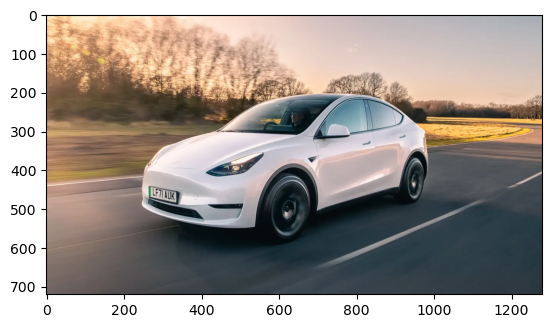

In [3]:
img = Image.open('Tesla Model Y.png')
pixels = img.load()

plt.imshow(img);

In [4]:
img_convolved = img.copy()
pixels2 = img_convolved.load()

In [18]:
filter1 = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]


filter2 = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]


filter3 = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]



filter4 = [
    [-1, 0, -1],
    [1, 0, 1],
    [-1, 0, -1]
]



filter5 = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]


filter6 = [
    [4,-1,0,-1,4],
    [-1,0,4,0,-1],
    [5,-1,0,-1,5],
    [-1,0,4,0,-1],
    [4,-1,0,-1,4]
]


filter7 = [
    [-1, -3, -1],
    [0, 0, 0],
    [4, 1, 4]
]

filter8 = [
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
]
;

''

In [11]:
def conv(filter,red,green,blue):
    div = 0
    for i in range(len(filter)):
        for j in range(len(filter[0])):
            div += filter[i][j]
    if div == 0:
        div = 1

    for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
        for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
            matrR = []
            matrG = []
            matrB = []
            for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                rowR = []
                rowG = []
                rowB = []
                for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                    r, g, b = pixels[i + n, j + m]
                    rowR.append(r)
                    rowG.append(g)
                    rowB.append(b)
                matrR.append(rowR)
                matrG.append(rowG)
                matrB.append(rowB)

            r = np.clip(round(convolution(matrR, filter) / div), 0, red)
            g = np.clip(round(convolution(matrG, filter) / div), 0, green)
            b = np.clip(round(convolution(matrB, filter) / div), 0, blue)

            pixels2[i, j] = (r, g, b)
    plt.imshow(img_convolved);

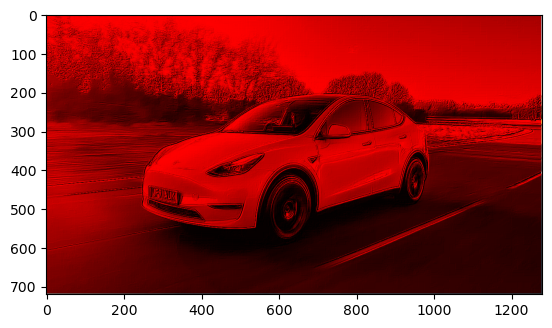

In [12]:
filter = filter1
conv(filter,255,0,0)

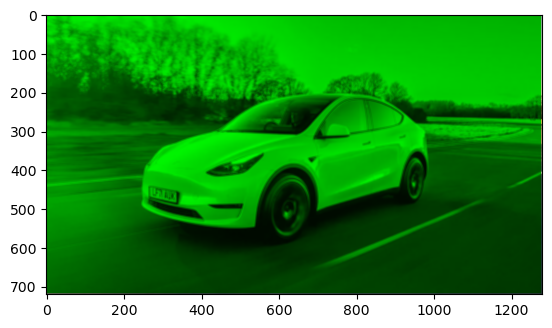

In [13]:
filter = filter2
conv(filter,0,255,0)

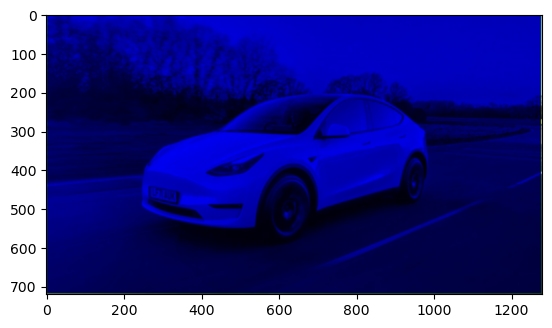

In [14]:
filter = filter3
conv(filter,0,0,255)

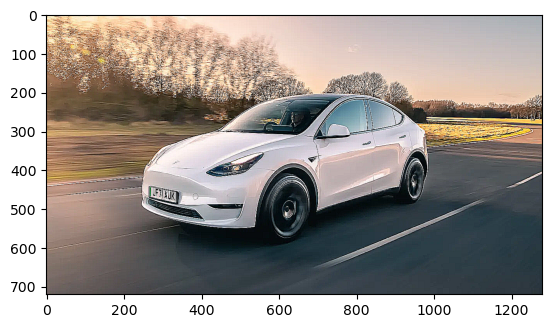

In [15]:
filter = filter4
conv(filter,255,255,255)

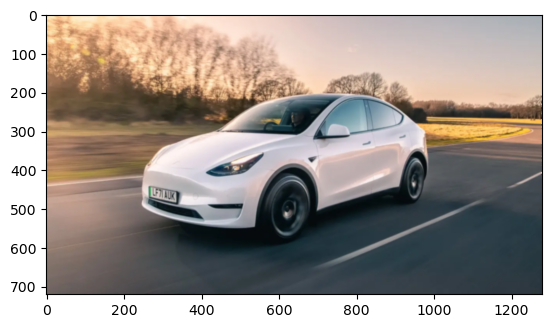

In [16]:
filter = filter5
conv(filter,255,255,255)

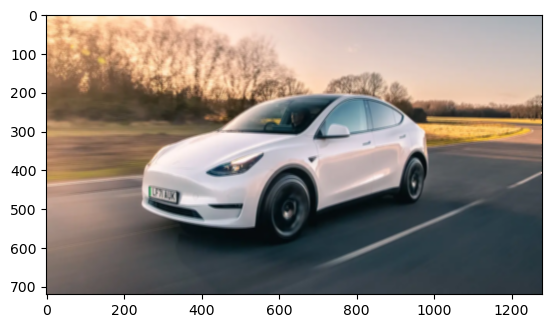

In [19]:
filter = filter6
conv(filter,255,255,255)

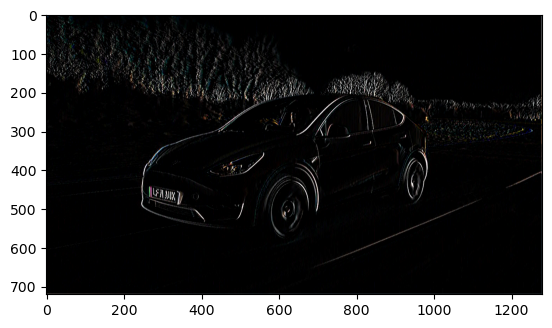

In [22]:
filter = filter7
conv(filter,255,255,255)

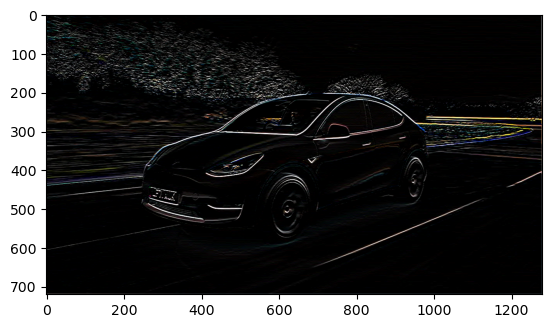

In [21]:
filter = filter8
conv(filter,255,255,255)